In [1]:
%matplotlib inline
import hscana
import numpy as np 
import matplotlib.pyplot as plt
group_regions = hscana.read_pickled_data('/home/jgreco/data/tracts_and_patches.pkl')
group_info = np.genfromtxt('/home/jgreco/data/group_info.csv', delimiter=',',\
                           dtype='i8,f8,f8,f8,f8,f8,f8,f8,i8', names=True)

In [2]:
group_id = 1925
band = 'I'
idx = group_info['group_id'] == group_id
D_A = group_info['D_A'][idx][0]
D_L = group_info['D_L'][idx][0]
candy = []

for tract, patch in group_regions[group_id]:
    mycat = hscana.MyCat(tract, patch, band, group_id, makecuts=True)
    if mycat.count()>0:
        candy.append(mycat)
        
# get coordinates of all candidates
coords = []
for i in range(len(candy)):
    for ra, dec in candy[i].coord():
        coords.append((ra, dec))
coords = np.array(coords)
        
# build mask for double entries
mask = np.ones(coords.shape[0], dtype=bool)
for i, (ra, dec) in enumerate(coords):
    if mask[i]==True:
        unique = hscana.angsep(ra, dec, coords[:,0], coords[:,1]) > 2
        unique[i] = True
        mask &= unique

coords = coords[mask]
        
print 'number of candidates =', coords.shape[0]
np.savetxt('output/group_'+str(group_id)+'_coords.csv', coords, delimiter=',', header='ra,dec')

number of candidates = 182


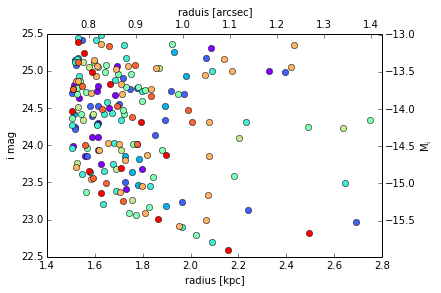

In [3]:
f1, a1 = plt.subplots(1,1)
colors = plt.cm.rainbow(np.linspace(0,1,len(candy)))
for i in range(len(candy)):
    a1.plot(candy[i].size, candy[i].mag, 'o', c=colors[i])
a1.set_xlabel('radius [kpc]')
a1.set_ylabel(band.lower()+' mag')
a1_tx = a1.twinx()
ylim = a1.get_ylim()
a1_tx.set_ylim(ylim[0]-5.0*np.log10(D_L*1e6)+5.0, ylim[1]-5.0*np.log10(D_L*1e6)+5.0)
a1_tx.set_ylabel(r'M$_'+band.lower()+'$')
a1_ty = a1.twiny()
xlim = a1.get_xlim()
a1_ty.set_xlim(206265*xlim[0]/(D_A*1e3), 206265*xlim[1]/(D_A*1e3))
a1_ty.set_xlabel('raduis [arcsec]');

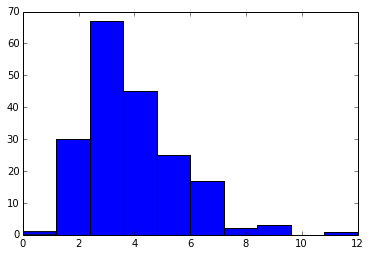

In [6]:
nchild = []; 
for i in range(len(candy)):
    nchild.extend(candy[i].cat.get('deblend.nchild'))
plt.hist(nchild);

In [8]:
for c in candy:
    mask = c.cat.get('deblend.nchild')>8
    for ra, dec, nchild in zip(c.ra[mask], c.dec[mask], c.cat.get('deblend.nchild')[mask]):
        print ra, dec, nchild